# Kurs i dataanalyse med programmering

Dette dokumentet er kursnotater for et kurs i dataanalyse med programmering.

Innhold:
- Lese data ut fra excel-filer, csv-filer og kilder på nettet fra for eksempel Statistisk sentralbyrå
- Bearbeiding av data og plotting av grafer
- Skrive resultater til excel-filer eller csv-filer
- Innholdet på kurset er i hovedsak språkuavhengig

Anbefalte forkunnskaper:
- Grunnleggende erfaring med Python eller andre programmeringsspråk
- Grunnleggende erfaring med datatyper som string, list, int og float
- Grunnleggende erfaring med for- og whileløkker
- Grunnleggende erfaringer med funksjoner, inputs og outputs

## Åpne en csv-fil
Dette gjøres på ulike måter avhengig av filformat og hva vi vil gjøre. La oss begynne helt grunnleggende med en csv-fil. Dette står for "comma separated values", og er et standard format å lagre data. Se under tabellen fra Statistisk sentralbyrå, der det står "Last ned som CSV-fil": https://www.ssb.no/befolkning/statistikker/befsvalbard

Prøv å laste ned filen og åpne den i Notisblokk (Notepad). Du vil da få et bilde som vist under. Det er de samme dataene som i tabellen på nettsiden til SSB, men lagret i et kompakt format (og ikke avhengig av betalingsløsninger som Excel).

<img src="csv eksempel.png">

Vi kan åpne denne filen og lese ut innholdet. Legg merke til at SSB har valgt å bruke semikolon i stedet for komma for å skille verdiene. Dette er trolig fordi vi på norsk bruker komma for å skrive desimaltall, og derfor vil det være dumt å bruke komma for å skille mellom verdiene, siden man da ikke ville visst om det var et desimaltall eller to separate tall. Vi bruker encoding utf-8 for at Python skal kjenne igjen norske bokstaver. Uten denne vil "halvår" bli "halvÃ¥r".

In [41]:
fil = open("Befolkningen på Svalbard.csv", encoding='utf-8-sig')
for rad in fil:
    print(rad)

;2. halvår 2020;2. halvår 2020;2. halvår 2020;

I alt;Menn;Kvinner;

I alt;2417;1302;1115;

0 år;15;9;6;

1-5 år;107;53;54;

6-12 år;170;89;81;

13-15 år;53;33;20;

16-19 år;84;43;41;

20-44 år;1294;669;625;

45-66 år;649;373;276;

67 år eller eldre;45;33;12;



Denne måten å åpne en csv-fil på virker bare hvis filen er i samme mappe som python-filen vi jobber i. Du kan åpne filer fra andre mapper som vist under. Legg merke til at det er dobbel \ selv om det i Windows bare er C:\Users\oyste\Downloads. Dette er fordi \ er en "escape character" i strings i Python. Du kan lese mer om dette hvis du vil, bare husk på at i mappe-adresser på PCen må du ha dobbel \.

In [40]:
nyfil = open("C:\\Users\\oyste\\Downloads\\" + "eksempel.csv", encoding='utf-8-sig')
for rad in nyfil:
    print(rad)

;2. halvår 2020;2. halvår 2020;2. halvår 2020;

I alt;Menn;Kvinner;

I alt;2417;1302;1115;

0 år;15;9;6;

1-5 år;107;53;54;

6-12 år;170;89;81;

13-15 år;53;33;20;

16-19 år;84;43;41;

20-44 år;1294;669;625;

45-66 år;649;373;276;

67 år eller eldre;45;33;12;



Det finnes også egne Python-verktøy for å jobbe med csv-filer, se eksemplet under. Denne fil-leseren har en fordel ved at den deler opp en rad i elementer og lager en liste av de, i stedet for at hele raden er én sammenhengende tekst-streng.

In [45]:
import csv
with open('Befolkningen på Svalbard.csv', encoding = "utf-8-sig") as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        print(row)

['', '2. halvår 2020', '2. halvår 2020', '2. halvår 2020', '']
['I alt', 'Menn', 'Kvinner', '']
['I alt', '2417', '1302', '1115', '']
['0 år', '15', '9', '6', '']
['1-5 år', '107', '53', '54', '']
['6-12 år', '170', '89', '81', '']
['13-15 år', '53', '33', '20', '']
['16-19 år', '84', '43', '41', '']
['20-44 år', '1294', '669', '625', '']
['45-66 år', '649', '373', '276', '']
['67 år eller eldre', '45', '33', '12', '']


Det er noen svakheter, som f.eks. at hver liste/rad avsluttes med et komma og en tom string: , ''

Dette skjer fordi SSB har valgt å avslutte hver rad med semikolon. Dette håndterer vi ved å fjerne semikolon på slutten av hver rad, eller ved å bare ignorere siste element i listene.

Legg merke til at hvert element i listene er tekst/string. Noen av disse må konverteres til tall/float/int. I denne sammenhengen gjelder tallene antall mennesker, og desimaltall er ikke relevant. Vi bruker derfor heltall/int.

Under er et grunnleggende eksempel på hvordan vi kan lese ut data til et mer håndterbart format. Her velger vi å bruke en liste per kolonne, men vi kunne også valgt å bruke en liste per rad, eller å strukturere dataene på en annen måte.

In [70]:
import csv

aldersgruppeliste = []
sumliste = []
mennliste = []
kvinneliste = []

with open('Befolkningen på Svalbard.csv', encoding = "utf-8-sig") as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    next(reader) # hopper over første rad
    next(reader) # hopper over andre rad
    for rad in reader:
        print(rad)
        aldersgruppeliste.append(rad[0])
        sumliste.append(int(rad[1]))
        mennliste.append(int(rad[2]))
        kvinneliste.append(int(rad[3]))

print(aldersgruppeliste)
print(sumliste)
print(mennliste)
print(kvinneliste)

['I alt', '2417', '1302', '1115', '']
['0 år', '15', '9', '6', '']
['1-5 år', '107', '53', '54', '']
['6-12 år', '170', '89', '81', '']
['13-15 år', '53', '33', '20', '']
['16-19 år', '84', '43', '41', '']
['20-44 år', '1294', '669', '625', '']
['45-66 år', '649', '373', '276', '']
['67 år eller eldre', '45', '33', '12', '']
['I alt', '0 år', '1-5 år', '6-12 år', '13-15 år', '16-19 år', '20-44 år', '45-66 år', '67 år eller eldre']
[2417, 15, 107, 170, 53, 84, 1294, 649, 45]
[1302, 9, 53, 89, 33, 43, 669, 373, 33]
[1115, 6, 54, 81, 20, 41, 625, 276, 12]


Vi kan bruke disse dataene f.eks. til å lage et plot over aldersfordelingen. Vi bruker mennliste[:1] for å ikke ta med summen av alle menn (1302).

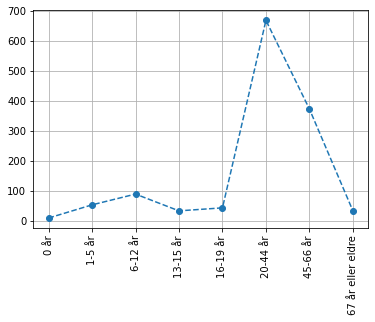

In [145]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

plt.plot(mennliste[1:], linestyle='--', marker='o')

plt.xticks(np.arange(len(mennliste[1:])), aldersgruppeliste[1:], rotation ='vertical')
plt.grid()
plt.show()

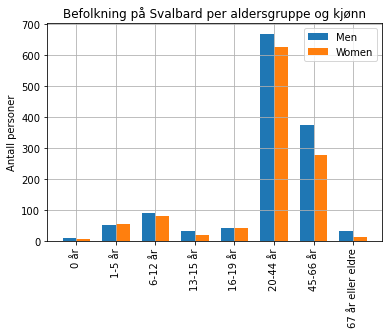

In [132]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = aldersgruppeliste[1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mennliste[1:], width, label='Menn')
rects2 = ax.bar(x + width/2, kvinneliste[1:], width, label='Kvinner')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Antall personer')
ax.set_title('Befolkning på Svalbard per aldersgruppe og kjønn')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation ='vertical')
ax.legend()

plt.grid()
plt.show()

# Modifisert fra https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

Vi kan gjøre beregninger på tallene, f.eks. kunne vi satt opp estimater for tallene for neste år. La oss hoppe over selve beregningene nå, og late som estimatene for neste år er slik:

In [142]:
print(mennliste)
print(kvinneliste)
mennliste_2021 = [1303, 9, 55, 93, 35, 42, 681, 356, 32]
kvinneliste_2021 = [1128, 7, 56, 83, 19, 40, 630, 280, 13]

[1302, 9, 53, 89, 33, 43, 669, 373, 33]
[1115, 6, 54, 81, 20, 41, 625, 276, 12]


Når vi har gjort beregninger bør vi lagre dataene slik at vi ikke må gjøre beregningene på nytt hver gang vi vil se eller bruke de. Vi kan lagre til en ny csv-fil på f.eks. denne måten:

In [144]:
import csv
with open('estimater_2021.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(["Estimater for befolkning på Svalbard i 2021"])
    for i in range(len(aldersgruppeliste)):
        rad = [aldersgruppeliste[i], mennliste_2021[i], kvinneliste_2021[i]]
        writer.writerow(rad)

Vi får da en fil med resultatene som ser slik ut:
<img src="csv output eksempel.png">

## Verktøyet Pandas for dataanalyse
Vi kan bruke Pandas for å få hjelp til å håndtere store datamengder og utføre dataanalyse. La oss begynne med et enkelt eksempel. En måte vi kan lagre data i Python er i en dictionary. Det er en datatype som knytter et element til et annet element. Vi kan bruke en dictionary til å knytte en kolonne med verdier til en kolonneoverskrift.

In [156]:
data = {
    "timer_jobb": [4, 5, 2, 9],
    "lønn": [824, 1012, 359, 1703]
}

print(data)
print(data["timer_jobb"])

{'timer_jobb': [4, 5, 2, 9], 'lønn': [824, 1012, 359, 1703]}
[4, 5, 2, 9]


In [230]:
import pandas as pd

data = {
    "timer_jobb": [4, 5, 2, 9],
    "lønn": [824, 1012, 359, 1703]
}

# I Pandas bruker vi dataframes for å holde på dataene. De pleier å ha navn df.
df = pd.DataFrame(data)

print(df) 

   timer_jobb  lønn
0           4   824
1           5  1012
2           2   359
3           9  1703


Legg merke til at pandas viser oss et radnummer på venstre side. Dette begynner med 0, men teller ikke med overskriftene. Vi kan printe en eller flere bestemte rader:

In [164]:
print(df.loc[[1, 3]])

   timer_jobb  lønn
1           5  1012
3           9  1703


Vi kan endre radnummerene, men da endres også loc-funksjonen:

In [231]:
df = pd.DataFrame(data, index = ["mandag", "tirsdag", "onsdag", "torsdag"])
print(df)

print("\n")

print(df.loc[["tirsdag", "torsdag"]])

         timer_jobb  lønn
mandag            4   824
tirsdag           5  1012
onsdag            2   359
torsdag           9  1703


         timer_jobb  lønn
tirsdag           5  1012
torsdag           9  1703


Vi kan finne verdier i en bestemt rad og kolonne ved å bruke iloc med radnummer og kolonnenummer.

In [234]:
print(df.iloc[0,1])

824


## Åpne en csv-fil med Pandas
Pandas kan også brukes til å åpne filer. Se enkelt eksempel under. Legg merke til at Pandas gjør noen antakelser om hva som er overskrifter og innhold. Prøv med ulike verdier bak "header" for å se hva som skjer med overskriftsradene. Legg merke til forskjellen på "print(df)" og på å bare skrive "df" på en rad.

In [208]:
import pandas as pd

df = pd.read_csv("Befolkningen på Svalbard.csv", sep=";", header = 1)
print(df)
df

                   I alt  Menn  Kvinner  Unnamed: 3
I alt               2417  1302     1115         NaN
0 år                  15     9        6         NaN
1-5 år               107    53       54         NaN
6-12 år              170    89       81         NaN
13-15 år              53    33       20         NaN
16-19 år              84    43       41         NaN
20-44 år            1294   669      625         NaN
45-66 år             649   373      276         NaN
67 år eller eldre     45    33       12         NaN


,I alt,Menn,Kvinner,Unnamed: 3
I alt,2417,1302,1115,NaN
0 år,15,9,6,NaN
1-5 år,107,53,54,NaN
6-12 år,170,89,81,NaN
13-15 år,53,33,20,NaN
16-19 år,84,43,41,NaN
20-44 år,1294,669,625,NaN
45-66 år,649,373,276,NaN
67 år eller eldre,45,33,12,NaN


## Endre en dataframe
La oss si at vi ønsker å fjerne raden med "I alt" og kolonnen "I alt", siden det kan beregnes senere hvis vi vil ha det. Vi vil også fjerne kolonnen Unnamed til høyre.

In [213]:
import pandas as pd

df = pd.read_csv("Befolkningen på Svalbard.csv", sep=";", header = 1)
df = df.drop(["I alt"]) # fjerner en rad basert på radnavn
df

,I alt,Menn,Kvinner,Unnamed: 3
0 år,15,9,6,NaN
1-5 år,107,53,54,NaN
6-12 år,170,89,81,NaN
13-15 år,53,33,20,NaN
16-19 år,84,43,41,NaN
20-44 år,1294,669,625,NaN
45-66 år,649,373,276,NaN
67 år eller eldre,45,33,12,NaN


In [214]:
import pandas as pd

df = pd.read_csv("Befolkningen på Svalbard.csv", sep=";", header = 1)
df = df.drop(["I alt"]) # fjerner en rad basert på radnavn
df = df.drop(columns = ["I alt", "Unnamed: 3"]) # fjerner to kolonner basert på kolonnenavn
df

,Menn,Kvinner
0 år,9,6
1-5 år,53,54
6-12 år,89,81
13-15 år,33,20
16-19 år,43,41
20-44 år,669,625
45-66 år,373,276
67 år eller eldre,33,12


Vi kan endre overskrifter eller rad-navn:

In [226]:
import pandas as pd

df = pd.read_csv("Befolkningen på Svalbard.csv", sep=";", header = 1)
df = df.drop(["I alt"]) # fjerner en rad basert på radnavn
df = df.drop(columns = ["I alt", "Unnamed: 3"]) # fjerner to kolonner basert på kolonnenavn
df = df.rename(columns={"Menn": "Mennene"}, index={"0 år": "Babyer", "67 år eller eldre": "67+ år"})
df

,Mennene,Kvinner
Babyer,9,6
1-5 år,53,54
6-12 år,89,81
13-15 år,33,20
16-19 år,43,41
20-44 år,669,625
45-66 år,373,276
67+ år,33,12


Vi kan også endre verdien av enkelte celler:

In [238]:
import pandas as pd

df = pd.read_csv("Befolkningen på Svalbard.csv", sep=";", header = 1)
df = df.drop(["I alt"]) # fjerner en rad basert på radnavn
df = df.drop(columns = ["I alt", "Unnamed: 3"]) # fjerner to kolonner basert på kolonnenavn
df = df.replace(33, 999) # Endrer 33 til 99 i alle kolonner.
df = df.replace({43: "eple", 20: 888888}) # Endrer 43 til "eple" og 20 til 888888 i alle kolonner
df = df.replace({"Menn": {53: 777, 54: 0, 81: 0}}) # Endrer bare i enkelte kolonner
df

# Det er også mange andre måter å endre verdier på, se f.eks.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

,Menn,Kvinner
0 år,9,6
1-5 år,777,54
6-12 år,89,81
13-15 år,999,888888
16-19 år,eple,41
20-44 år,669,625
45-66 år,373,276
67 år eller eldre,999,12


## Lagre en dataframe til csv-fil
Når vi har gjort arbeid med en dataframe er det naturlig å lagre resultatet. Vi kan lagre til en csv-fil slik:

In [242]:
import pandas as pd

df = pd.read_csv("Befolkningen på Svalbard.csv", sep=";", header = 1)
df = df.drop(["I alt"]) # fjerner en rad basert på radnavn
df = df.drop(columns = ["I alt", "Unnamed: 3"])
df.to_csv("endret med pandas.csv", sep=";")
df.to_csv("endret med pandas uten index.csv", sep=";", index=False)

Dette gir disse to resultatene. Som vi ser bør vi ha med index-kolonnen hvis den inneholder informasjon, men den kan droppes hvis den bare teller fra 0 og oppover.
<img src="pandas csv output med index.png">
<img src="pandas csv output uten index.png">

## Plotte en dataframe
Pandas er ganske smart og kan hjelpe oss med å lage plots, men den gjetter på hva vi vil ha, så vi kan bli nødt til å spesifisere eller endre noe. Pandas benytter matplotlib, så du må importere det også.

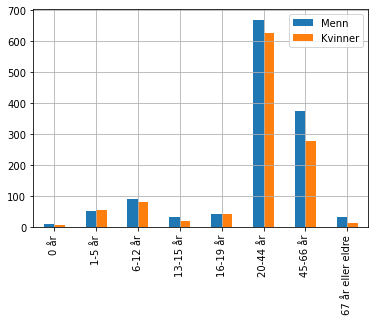

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Befolkningen på Svalbard.csv", sep=";", header = 1)
df = df.drop(["I alt"]) # fjerner en rad basert på radnavn
df = df.drop(columns = ["I alt", "Unnamed: 3"]) # fjerner to kolonner basert på kolonnenavn

df.plot(kind='bar', rot=90) # Roterer x-labels 90 grader
plt.grid()
plt.show()

## Åpne en Excel-fil med Pandas
Vi kan åpne Excel-filer i Python. En måte å gjøre det på er å bruke Pandas, som er et verktøy for dataanalyse i Python.

In [243]:
import pandas as pd
file = 'Befolkningen på Svalbard.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names) # Her kan du se de ulike fanenes navn
df1 = xl.parse('SSB') # Leser ut en bestemt fane
# Vi kan også lese ut bestemte kolonner: 
# data = pd.read_excel("file.xlsx", usecols="A,C,E,G")
df1

['SSB']


,"Folkemengde i Longyearbyen og Ny-Ålesund, etter kjønn og alder","Folkemengde i Longyearbyen og Ny-Ålesund, etter kjønn og alder.1","Folkemengde i Longyearbyen og Ny-Ålesund, etter kjønn og alder.2","Folkemengde i Longyearbyen og Ny-Ålesund, etter kjønn og alder.3"
0,NaN,2. halvår 20201,2. halvår 20201,2. halvår 20201
1,NaN,I alt,Menn,Kvinner
2,I alt,2417,1302,1115
3,0 år,15,9,6
4,1-5 år,107,53,54
5,6-12 år,170,89,81
6,13-15 år,53,33,20
7,16-19 år,84,43,41
8,20-44 år,1294,669,625
9,45-66 år,649,373,276


Rad 12, 13 og 14 var ikke med i csv-filen, disse må fjernes. I tillegg er overskriftene ikke veldig tydelige. Vi kan hoppe over første rad.

In [260]:
import pandas as pd
file = 'Befolkningen på Svalbard.xlsx'
xl = pd.ExcelFile(file)
df = xl.parse('SSB', skiprows=[0,1], index_col=0) # Leser ut en bestemt fane, dropper 2 rader
df = df.drop(df.index[[0, 9, 10, 11, 12]]).drop(columns = ["I alt"])
df

,Menn,Kvinner
0 år,9,6
1-5 år,53,54
6-12 år,89,81
13-15 år,33,20
16-19 år,43,41
20-44 år,669,625
45-66 år,373,276
67 år eller eldre,33,12


La oss nå lagre den nye tabellen der vi har fjernet noen kolonner og rader til et nytt Excel-dokument.

In [301]:
import pandas as pd
file = 'Befolkningen på Svalbard.xlsx'
xl = pd.ExcelFile(file)
df = xl.parse('SSB', skiprows=[0,1], index_col=0) # Leser ut en bestemt fane, dropper 2 rader
df = df.drop(df.index[[0, 9, 10, 11, 12]]).drop(columns = ["I alt"])

writer = pd.ExcelWriter('output til Excel.xlsx')

df.to_excel(writer, 'Ark37')

writer.save()

Vi kan også lage figurer i Excel basert på dataene, se enkelt eksempel under.

In [302]:
import pandas as pd
file = 'Befolkningen på Svalbard.xlsx'
xl = pd.ExcelFile(file)
df = xl.parse('SSB', skiprows=[0,1], index_col=0) # Leser ut en bestemt fane, dropper 2 rader
df = df.drop(df.index[[0, 9, 10, 11, 12]]).drop(columns = ["I alt"])

writer = pd.ExcelWriter('output til Excel2.xlsx')

df.to_excel(writer, 'Ark37')

workbook  = writer.book
worksheet = writer.sheets['Ark37']
chart1 = workbook.add_chart({'type': 'column'})
chart1.add_series({'values': '=Ark37!$B$2:$B$9'})
worksheet.insert_chart('E2', chart1)

chart2 = workbook.add_chart({'type': 'column'})
chart2.add_series({'values': '=Ark37!$C$2:$C$9'})
worksheet.insert_chart('B18', chart2)

writer.save()

Det er også mulig å lage mer avanserte figurer, men det er mer krevende.

In [300]:
import pandas as pd
file = 'Befolkningen på Svalbard.xlsx'
xl = pd.ExcelFile(file)
df = xl.parse('SSB', skiprows=[0,1], index_col=0) # Leser ut en bestemt fane, dropper 2 rader
df = df.drop(df.index[[0, 9, 10, 11, 12]]).drop(columns = ["I alt"])

writer = pd.ExcelWriter('output til Excel3.xlsx')

df.to_excel(writer, 'Ark37')

workbook  = writer.book
worksheet = writer.sheets['Ark37']

chart = workbook.add_chart({'type': 'column'})

for col_num in range(1, 3):
    chart.add_series({
        'name':       ['Ark37', 0, col_num],
        'categories': ['Ark37', 1, 0, 8, 0],
        'values':     ['Ark37', 1, col_num, 8, col_num],
        'gap':        300,
    })

#chart.set_y_axis({'major_gridlines': {'visible': False}})

worksheet.insert_chart('E2', chart)
    
writer.save()

# Modifisert fra https://pandas-xlsxwriter-charts.readthedocs.io/chart_grouped_column.html#chart-grouped-column

In [ ]:
# https://xlsxwriter.readthedocs.io/working_with_pandas.html
# https://pandas-xlsxwriter-charts.readthedocs.io/chart_examples.html

## Noen stikkord om statistikk i Python
Her er noen stikkord og lenker om statistikk.

https://docs.python.org/3/library/statistics.html
https://realpython.com/python-statistics/
http://scipy-lectures.org/packages/statistics/index.html

In [303]:
import numpy as np
   
# 1D array 
arr = [20, 2, 7, 1, 34]
print("arr : ", arr) 
print("50th percentile of arr : ", 
       np.percentile(arr, 50))
print("25th percentile of arr : ",
       np.percentile(arr, 25))
print("75th percentile of arr : ",
       np.percentile(arr, 75))

arr :  [20, 2, 7, 1, 34]
50th percentile of arr :  7.0
25th percentile of arr :  2.0
75th percentile of arr :  20.0
